In [1]:
#bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#arquivos csv
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv('sampleSubmission.csv')

In [3]:
#primeiras 5 linhas do dado
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [4]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
#somente dados de quantidade das pessoas que alugaram bike
train['count']

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [6]:
#dados com weather 1
train.loc[train.weather == 1]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [7]:
#dados com weather 2
train.loc[train.weather == 2]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47,47,94
14,2011-01-01 14:00:00,1,0,0,2,18.86,22.725,72,19.0012,35,71,106
15,2011-01-01 15:00:00,1,0,0,2,18.04,21.970,77,19.9995,40,70,110
16,2011-01-01 16:00:00,1,0,0,2,17.22,21.210,82,19.9995,41,52,93
...,...,...,...,...,...,...,...,...,...,...,...,...
10835,2012-12-17 21:00:00,4,0,1,2,17.22,21.210,94,8.9981,6,114,120
10836,2012-12-17 22:00:00,4,0,1,2,17.22,21.210,94,8.9981,5,49,54
10838,2012-12-18 00:00:00,4,0,1,2,18.04,21.970,94,8.9981,0,18,18
10839,2012-12-18 01:00:00,4,0,1,2,18.04,21.970,94,8.9981,0,15,15


In [8]:
#dados com weather 3
train.loc[train.weather == 3]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
18,2011-01-01 18:00:00,1,0,0,3,17.22,21.210,88,16.9979,9,26,35
19,2011-01-01 19:00:00,1,0,0,3,17.22,21.210,88,16.9979,6,31,37
29,2011-01-02 06:00:00,1,0,0,3,17.22,21.210,77,19.9995,0,2,2
31,2011-01-02 08:00:00,1,0,0,3,16.40,20.455,71,15.0013,0,8,8
37,2011-01-02 14:00:00,1,0,0,3,14.76,17.425,76,12.9980,4,55,59
...,...,...,...,...,...,...,...,...,...,...,...,...
10808,2012-12-16 18:00:00,4,0,0,3,15.58,19.695,82,7.0015,8,99,107
10818,2012-12-17 04:00:00,4,0,1,3,14.76,18.940,100,0.0000,2,3,5
10830,2012-12-17 16:00:00,4,0,1,3,16.40,20.455,94,16.9979,15,287,302
10837,2012-12-17 23:00:00,4,0,1,3,17.22,21.210,94,15.0013,6,41,47


In [9]:
#dados com weather 4
train.loc[train.weather == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164


In [10]:
#pegando somente os horarios de datetime
train['time'] = train['datetime'].str[10:13]
train['time']


0         00
1         01
2         02
3         03
4         04
        ... 
10881     19
10882     20
10883     21
10884     22
10885     23
Name: time, Length: 10886, dtype: object

In [11]:
test['time'] = test['datetime'].str[10:13]
test['time']

0        00
1        01
2        02
3        03
4        04
       ... 
6488     19
6489     20
6490     21
6491     22
6492     23
Name: time, Length: 6493, dtype: object

In [12]:
#transformando dtype: object para dtype: int
train['time'] = train['time'].astype(int)
train["time"]

0         0
1         1
2         2
3         3
4         4
         ..
10881    19
10882    20
10883    21
10884    22
10885    23
Name: time, Length: 10886, dtype: int32

In [13]:
test['time'] = test['time'].astype(int)
test["time"]

0        0
1        1
2        2
3        3
4        4
        ..
6488    19
6489    20
6490    21
6491    22
6492    23
Name: time, Length: 6493, dtype: int32

C:\Users\samyl\AppData\Local\Temp\ipykernel_3492\1825598753.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = train.corr()


<AxesSubplot: >

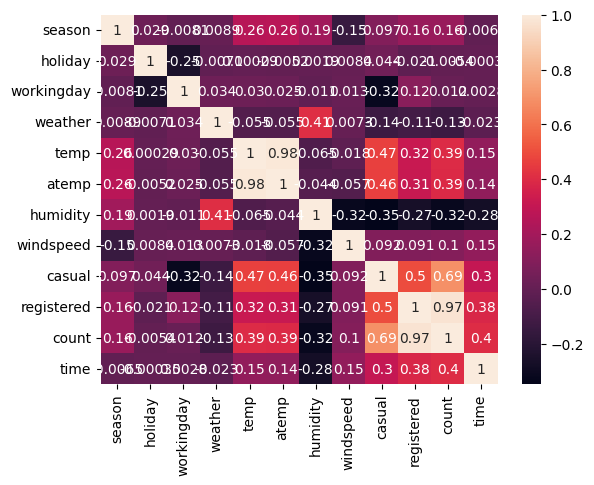

In [14]:
#ver as relações entre os dados
correlacao = train.corr()
plt.figure()
sns.heatmap(data=correlacao, annot=True)

In [15]:
#coluna de previsão é y
y = test.count

In [16]:
#recursos
test_features = ['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'time']

In [17]:
#coluna de recursos é x
x = test[test_features]

In [18]:
x.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,time
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157,11.555367
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151,6.912526
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500,6.000000
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400,12.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900,18.000000
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600,23.000000


In [19]:
x.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,time
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,4


In [20]:
from sklearn.tree import DecisionTreeRegressor